<a href="https://colab.research.google.com/github/JSJeong-me/SEMICON-BigData/blob/main/tip_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Assignment 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
data = pd.read_csv("./tips.csv")

## Sample Data

In [82]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [23]:
data['sex'] = data['sex'].replace({'Female': 0, 'Male': 1})
data['smoker'] = data['smoker'].replace({'No': 0, 'Yes': 1})
data['time'] = data['time'].replace({'Lunch': 0, 'Dinner': 1})
    
# Ordinal encoding
data['day'] = data['day'].replace({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

In [24]:
data.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,241.000000
mean,19.785943,2.998279,0.643443,0.381148,1.725410,0.721311,2.556017
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.947571
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


### 1.What is the overall average tip?

In [37]:
data['tip'].mean()

2.9982786885245902

### 2.Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [4]:
data['tip'].median()

2.9

Hence, Median & mean are almost same.

If the distribution is symmetric then the mean is equal to the median and the distribution will have zero skewness

### 3.Prepare a boxplot for 'tip', are there any outliers?  

In [ ]:
sns.boxplot(x="tip", data=data)

In [ ]:
q3, q1 = np.percentile(data.tip, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

### 4.Prepare a boxplot for 'total_bill', are there any outliers?

In [ ]:
sns.boxplot(x="total_bill", data = data)

In [ ]:
q3, q1 = np.percentile(data.total_bill, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

### 5. Gender: what is the percent of females in the data?

In [ ]:
data.groupby('sex').size()

In [ ]:
x = data.groupby("sex").size()
t = data["sex"].count()
p = x/t * 100
p[0]

### 6.Prepare a bar plot with the bars representing the percentage of records for each gender.

In [ ]:
cnt = data.groupby(['sex']).count().reset_index()
cnt

In [40]:
cnt['count_perc'] = (cnt['total_bill']/ len(data)) *100
cnt

,sex,total_bill,tip,smoker,day,time,size,count_perc
0,Female,87,87,87,87,87,86,35.655738
1,Male,157,157,157,157,157,155,64.344262


In [ ]:
sns.barplot(x="sex",y='count_perc',
            hue = 'count_perc'
            ,data = cnt)

In [ ]:
cnt = data.groupby(['sex']).count().reset_index()
cnt
cnt['count_perc'] = (cnt['total_bill']/ len(data)) *100 

plt.pie(x='count_perc',data=cnt,labels=['Female', 'Male'], autopct='%1.1f%%',
       shadow=True, startangle=90)


### 7.Does the average tip differ by gender? Does one gender tip more than the other?

In [42]:
data.groupby(["sex"]).mean()['tip']

Series([], Name: tip, dtype: float64)

yes, the avg value of male tip is greater than female tip

### 8. Does the average tip differ by the time of day?

In [ ]:
data.groupby(["day","time"]).mean()['tip']

In [ ]:
data.groupby(["day"]).mean()['tip']

In [ ]:
data.groupby(["time"]).mean()['tip']

### 9. Does the average tip differ by size (number of people at the table)?

In [55]:
data.groupby('size').mean()['tip']

size
1.0    1.437500
2.0    2.582308
3.0    3.384595
4.0    4.012286
5.0    4.028000
6.0    5.225000
Name: tip, dtype: float64

### 10. Do smokers tip more than non-smokers?

In [ ]:
data.groupby('smoker').sum()['tip']

### 11. Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [ ]:
data.groupby(['sex','smoker']).mean()['tip']

### 12.Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [90]:
data['pct_tip'] = data['tip']/data['total_bill']

### 13. Does pct_tip differ by gender? Does one gender tip more than the other?

In [ ]:
data.groupby(["sex"]).sum()['pct_tip']

### 14. Does pct_tip differ by size (number of people at the table)?

In [ ]:
data.groupby(["size"]).sum()['pct_tip']

### 15. Make the gender vs. smoker view using pct_tip - does your inference change?

In [ ]:
data['sex'].groupby(data["smoker"]).value_counts(normalize=True).rename('pct_tip').reset_index()


x,y,hue = 'sex','pct_tip','smoker'

sns.barplot(x,y,hue,data=data)


### 16. Make a scatter plot of total_bill vs. tip.

In [ ]:
sns.scatterplot(x="total_bill", y = "tip",
               data = data)

### 17. Make a scatter plot of total_bill vs. pct_tip.

In [ ]:
sns.scatterplot(x="total_bill", y = "pct_tip",
               data = data)

In [ ]:
data["smoker"].count()

### 18. Paired Plot

In [ ]:
sns.pairplot(data.loc[:, ['total_bill', 'tip']])

In [ ]:
#sns.pairplot(data.loc[:, ['total_bill', 'day']])

### 19. Total bill abd Tip ratio

In [86]:
#data['tip_rate'] = (data['tip']/data['total_bill'])*100

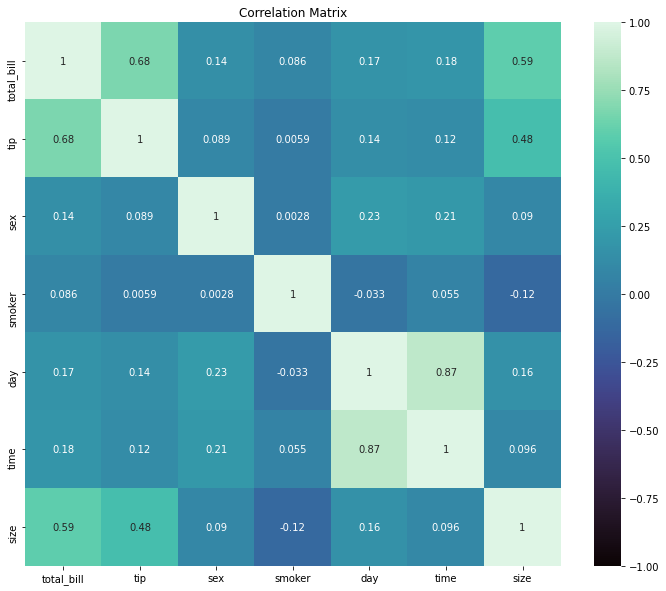

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Matrix")
plt.show()

### 20. Profile Report

In [ ]:
#!pip install -U pandas-profiling

In [1]:
import pandas_profiling

In [ ]:
data.profile_report()

### 21. Z transform

In [6]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
data_scale_std = data.drop(['sex', 'smoker', 'day', 'time'], axis = 1)

In [ ]:
data_scale_std.describe()

In [12]:
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale

In [ ]:
# scale변환 : 표준정규분포 기준
df_scale_std = scale(data_scale_std)
# scale 변환하면 numpy의 행렬 형태로 저장 -> DataFrame으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = data_scale_std.columns)
df_scale_std.head()

In [ ]:
df_scale_std.describe().round()

In [ ]:
df_scale_std.profile_report()

### 22. Stack & Unstack

In [27]:
tips_gb = data.groupby(['day','sex']).agg({'size':'sum'})

In [ ]:
tips_gb

In [ ]:
tips_gb.stack()

In [30]:
tips_us = tips_gb.unstack()

In [ ]:
tips_us

In [ ]:
tips_gb.unstack(0)

In [ ]:
tips_us.stack()

In [34]:
tips_us.stack(0)

,sex,0,1
day,,,
0,size,79.0,73.0
1,size,19.0,21.0
2,size,63.0,152.0
3,size,49.0,160.0
